# Proyecto 1  - Modelos de regresión aplicados al análisis de salarios

29/09/2025

Profesor: Gabriel Alejandro Morales Ruiz

Integrantes:
- Pablo Josué Panécatl García
- Jesús Alejandro García García
- Paola Andrea Figueroa Álvarez


## 1. Objetivos

### Generales
Analizar el conjunto de datos de salarios con el fin de construir y evaluar modelos de regresión (lineal, polinomial y con penalización) que permitan explicar y predecir el nivel salarial de los empleados a partir de factores individuales y laborales, mostrando tanto los fundamentos teóricos como la aplicación práctica del modelado estadístico.

### Específicos
- Explorar y limpiar el dataset para garantizar la calidad de los datos (tratamiento de nulos, duplicados y escalamiento de categorías).
- Identificar las variables más relevantes que influyen en el salario, como género, nivel educativo, puesto de trabajo y experiencia.
- Construir modelos de regresión lineal y polinomial para evaluar su capacidad explicativa sobre el salario.
- Analizar la interacción de factores y su efecto en la variable dependiente.
- Aplicar técnicas de penalización (Ridge, Lasso y ElasticNet) para mejorar la generalización del modelo y comparar su desempeño.
- Interpretar los resultados de manera estadística y práctica, vinculándolos con la estructura del salario y en base a qué se da.

## 2. Marco Teórico

### - Regresión lineal
Es una combinación lineal de factores independientes, es decir, que ninguno de los vectores puede expresarse como una combinación lineal de los demás, para poder aproximar. Su principal objetivo es buscar explicar la relación entre una variable dependiente y una o varias variables dependientes. En su ecuación original y= B0+B1X1+ BnXn + e, las betas son las incógnitas y la e representa el error, cuya suma no indica calidad, por lo que para esto se utiliza un coeficiente de determinación para, de esta manera, comparar modelos en base a que tanto de la varianza de salida corresponde a la varianza de entrada. 

### - Regresión polinomial
Extiende la regresión lineal al incluir potencias de las variables predictoras, permitiendo capturar relaciones no lineales. Para este caso, podríamos usar un polinomio de grado dos, cuya ecuación sería como la siguiente: y= BO+ B1X + B2X^2, donde el término X2^2 permite capturar curvaturas en la tendencia de los datos. Este tipo de regresión es útil cuando la relación entre las variables no sigue una línea recta, sino que presenta comportamientos con mayor posibilidad de fluctuación, es decir,  incrementos o decrecimientos acelerados. Es importante mantener un buen balance de factores, ya que a veces, a medida que el modelo se vuelve más complejo, corre el riesgo de sobreajustarse (overfitting), es decir, ajustarse demasiado a los datos de entrenamiento y perder capacidad de generalización. 

### - Interacción de factores
Las interacciones de factores en un modelo de regresión significa que el efecto de una variable (como la edad) sobre otra variable (como el salario) cambia dependiendo del valor de una tercera variable (como el puesto de trabajo). "Esto permite entender que, según el contexto que aporte la segunda variable, la relación entre la primera variable y la respuesta puede fortalecerse, debilitarse o incluso invertirse" (Lewinson, 2023).La interacción señala que los efectos no son fijos, sino que se ajustan a diferentes escenarios según cómo se combinan las variables involucradas, permitiendo modelar efectos combinados de dos o más variables. 
### - Regularización
Conjunto de técnicas utilizadas para prevenir el sobreajuste (overfitting) de un modelo al conjunto de entrenamiento, penalizando la magnitud de los coeficientes. Es decir que se obliga al modelo para quitarle peso a una variable y tomar otras en consideración, permitiéndo que el modelo sea más simple, haga una buena extrapolación y, por lo tanto, generalice mejor. Para fines de este proyecto, no estaremos enfocando en tres tipos: 
- Ridge (L2): Añade la suma de los cuadrados de los coeficientes a la función de costo, haciendo que la magnitud de los coeficientes disminuya pero sin llevarlos a 0.
- Lasso (L1): Añade la suma de los valores absolutos de los coeficientes a la función de costo. A diferencia de Ridge, se pueden llevar los coeficientes menos importantes a 0, de manera que esta realiza una selección de características para ver lo que es más significativo en el modelo.
- ElasticNet: Combina las penalizaciones Ridge y Lasso, ofreciendo un balance entre la reducción de coeficientes y la selección de características.

### - Tema elegido:
Datos de salario en función de atributos como la edad, los años de experiencia, el nivel de educación y la categoría del puesto de trabajo.

## 3. Análisis de Dataset



### ¿De dónde viene?
Se obtuvo de Kaggle, una página de datasets. 
### ¿Qué contiene?
Incluye variables como salario anual, género, nivel educativo, título del puesto de trabajo y experiencia laboral, entre otras.
### ¿Qué información dan las muestras?
Cada fila representa a un empleado con sus características individuales y laborales, junto con el salario recibido.
### ¿Qué se quiere analizar?
El objetivo es identificar qué factores explican mejor el salario y si es posible predecirlo con base en las características observadas.
### ¿Qué variables se tienen que transformar para poder usarse en un modelo de regresión?
Transfromamos todas las variables que son objetos, conviertiéndolas en dummies, como el caso de las siguientes variables: género, nivel de educación y título del trabajo. P
### ¿Qué transformaciones se van a usar?
- Limpieza de categorías duplicadas o inconsistentes (ej. “Master's” vs. “Master's Degree”).
- Limpieza de nulos
- Creación de variables dummies para género, educación y categorías simplificadas de puesto de trabajo.
- Para el título de trabajo, en lugar de tener 193 nombres, decidimos categorizarlas en base a su funionalidad y herramientas que se usan; al final nos quedamos con 10 variables. 
### ¿Qué resultado se podría encontrar al realizar una regresión?
Se espera identificar qué factores tienen mayor peso en la explicación de los salarios, evaluar si existen interacciones relevantes y construir modelos predictivos con buen ajuste y generalización.

## 4. Modelos Propuestos
Se propone evaluar tres modelos de regresión polinomial, aumentando progresivamente el grado, para capturar la posible complejidad lineal y no lineal en la relación entre las variables dependientes y el salario, comparando los resultados con y sin regularización:
- Modelo 1: Regresión Lineal Múltiple
- Modelo 2: Regresión Polinomial de Grado 2, incluyendo términos al cuadrado.
- Modelo 3: Regresión Polinomial de Grado 3, incluyendo términos al cubo. 

Decidimos ir escalando el grado para explorar un ajuste más complejo, a pesar del riesgo de sobreajuste y, así, ver qué modelo se ajusta mejor. Para asegurarnos de que el modelo funcione bien con datos nuevos usaremos K-Fold Cross-Validation con K=5, donde se estarán usando 4 grupos para entrenar el modelo, mientras que el restante es para ver qué tan bien funciona. Repetiremos esto 5 veces, cada vez usando un grupo diferente para la prueba. Así, tendremos 5 evaluaciones del modelo y podremos ver qué tan estable y confiable es su rendimiento en diferentes conjuntos de datos.
Adicionalmente, usaremos Ridge, Lasso y ElasticNet para observar la complejidad del modelo y cuál sería la mejor para predecir.


## 5. Pipeline

### 1. Análisis Exploratorio de Datos

In [133]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import warnings
from scipy import stats 
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
from sklearn.linear_model import Ridge, ElasticNet, Lasso, LinearRegression
from sklearn.model_selection import LeaveOneOut, train_test_split, KFold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures


In [134]:
df = pd.read_csv("Salary_Data_2pao.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  6702 non-null   float64
 1   Gender               6702 non-null   object 
 2   Education Level      6701 non-null   object 
 3   Job Title            6702 non-null   object 
 4   Years of Experience  6701 non-null   float64
 5   Salary               6699 non-null   float64
dtypes: float64(3), object(3)
memory usage: 314.4+ KB


Es bueno saber que cada columna tiene el tipo correcto de datos

In [135]:
df.isnull().sum()/len(df)

Age                    0.000298
Gender                 0.000298
Education Level        0.000447
Job Title              0.000298
Years of Experience    0.000447
Salary                 0.000746
dtype: float64

Hay unos cuantos nulos

In [136]:
df.duplicated().sum()

4912

In [137]:
df.describe()

,Age,Years of Experience,Salary
count,6702.000000,6701.000000,6699.000000
mean,33.620859,8.094687,115326.964771
std,7.614633,6.059003,52786.183911
min,21.000000,0.000000,350.000000
25%,28.000000,3.000000,70000.000000
50%,32.000000,7.000000,115000.000000
75%,38.000000,12.000000,160000.000000
max,62.000000,34.000000,250000.000000


El .describe() ayuda a saber cómo se comportan las variables numéricas

In [138]:
df['Gender'].unique()

array(['Male', 'Female', nan, 'Other'], dtype=object)

Ideal para hacer dummies

In [139]:
df['Education Level'].unique()

array(["Bachelor's", "Master's", 'PhD', nan, "Bachelor's Degree",
       "Master's Degree", 'High School', 'phD'], dtype=object)

Es interesante ver que hay "Master's" y "Master's Degree" y el mismo caso para Bachelor's. Creo que podríamos unirlos

In [140]:
df['Job Title'].unique()

array(['Software Engineer', 'Data Analyst', 'Senior Manager',
       'Sales Associate', 'Director', 'Marketing Analyst',
       'Product Manager', 'Sales Manager', 'Marketing Coordinator',
       'Senior Scientist', 'Software Developer', 'HR Manager',
       'Financial Analyst', 'Project Manager', 'Customer Service Rep',
       'Operations Manager', 'Marketing Manager', 'Senior Engineer',
       'Data Entry Clerk', 'Sales Director', 'Business Analyst',
       'VP of Operations', 'IT Support', 'Recruiter', 'Financial Manager',
       'Social Media Specialist', 'Software Manager', 'Junior Developer',
       'Senior Consultant', 'Product Designer', 'CEO', 'Accountant',
       'Data Scientist', 'Marketing Specialist', 'Technical Writer',
       'HR Generalist', 'Project Engineer', 'Customer Success Rep',
       'Sales Executive', 'UX Designer', 'Operations Director',
       'Network Engineer', 'Administrative Assistant',
       'Strategy Consultant', 'Copywriter', 'Account Manager',
      

Este sí va a ser un problemón que muy probablemente resolvamos con IA

### 2. Feature Engineering

In [141]:
df.dropna(inplace=True)

In [142]:
df.drop_duplicates(inplace=True)

Borramos nulos porque son muy pocos

In [143]:
df['Job Title Clean'] = df['Job Title'].str.lower().str.strip()
df['Job Title Clean'] = df['Job Title Clean'].str.replace('juniour', 'junior', regex=False)

Hacemos Dummies para el puesto de trabajo porque son muchísimos

In [144]:
def categorize_job(title):
    if pd.isna(title):
        return 'Unknown'
    
    title = str(title).lower()

    if any(keyword in title for keyword in ['software', 'developer', 'engineer', 'it', 'technical support', 'network', 'web dev', 'stack', 'front end', 'back end']):
        return 'Tecnología e IT'
    elif any(keyword in title for keyword in ['data analy', 'data scien', 'business intelligence', 'data engineer']):
        return 'Análisis de Datos'
    elif any(keyword in title for keyword in ['sales', 'account manager', 'business development', 'account executive']):
        return 'Ventas y Biz Dev'
    elif any(keyword in title for keyword in ['marketing', 'social media', 'copywriter', 'content', 'public relations', 'creative', 'graphic designer']):
        return 'Marketing y Comunicación'
    elif any(keyword in title for keyword in ['hr', 'human resources', 'recruiter', 'training']):
        return 'Recursos Humanos'
    elif any(keyword in title for keyword in ['financial', 'accountant', 'finance']):
        return 'Finanzas y Contabilidad'
    elif any(keyword in title for keyword in ['operations', 'project manager', 'supply chain', 'project engineer']):
        return 'Operaciones y Gestión'
    elif any(keyword in title for keyword in ['director', 'vp', 'ceo', 'chief', 'manager']):
        # Se pone al final para no capturar 'Project Manager' o 'Sales Manager' antes
        return 'Dirección y Liderazgo'
    elif any(keyword in title for keyword in ['customer service', 'customer success', 'help desk']):
        return 'Soporte al Cliente'
    elif any(keyword in title for keyword in ['product', 'ux', 'ui', 'designer']):
        return 'Producto y Diseño'
    elif any(keyword in title for keyword in ['administrative', 'office', 'clerk', 'receptionist']):
        return 'Administrativo'
    elif any(keyword in title for keyword in ['scientist', 'researcher']):
        return 'Investigación'
    else:
        return 'Otro'

In [145]:
# Aplicar la función para crear la nueva columna de categorías
df['Job Category'] = df['Job Title Clean'].apply(categorize_job)

# Verificar la distribución de las nuevas categorías
print(df['Job Category'].value_counts())

# Ahora sí, crea las variables dummy a partir de la nueva columna
df = pd.get_dummies(df, columns=['Job Category'], drop_first=True, prefix='Job')

Job Category
Tecnología e IT             812
Marketing y Comunicación    226
Análisis de Datos           160
Ventas y Biz Dev            151
Recursos Humanos            136
Dirección y Liderazgo        83
Operaciones y Gestión        73
Finanzas y Contabilidad      68
Investigación                25
Otro                         22
Producto y Diseño            19
Soporte al Cliente            6
Administrativo                6
Name: count, dtype: int64


Tiraremos la categoría "Otro" porque solo haría ruido en el modelo y la interpretación

In [146]:
df.drop(columns=['Job Title Clean', 'Job_Otro'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1787 non-null   float64
 1   Gender                        1787 non-null   object 
 2   Education Level               1787 non-null   object 
 3   Job Title                     1787 non-null   object 
 4   Years of Experience           1787 non-null   float64
 5   Salary                        1787 non-null   float64
 6   Job_Análisis de Datos         1787 non-null   bool   
 7   Job_Dirección y Liderazgo     1787 non-null   bool   
 8   Job_Finanzas y Contabilidad   1787 non-null   bool   
 9   Job_Investigación             1787 non-null   bool   
 10  Job_Marketing y Comunicación  1787 non-null   bool   
 11  Job_Operaciones y Gestión     1787 non-null   bool   
 12  Job_Producto y Diseño         1787 non-null   bool   
 13  Job_Recu

Hacemos variables dummies para los grados de educación

In [147]:
# 2. Convertir todo a minúsculas para estandarizar
df['Education Level'] = df['Education Level'].str.lower()

# 3. Reemplazar las variaciones para unificar los términos
#    Eliminamos ' degree' y corregimos 'phd'
df['Education Level'] = df['Education Level'].str.replace(' degree', '', regex=False)
df['Education Level'] = df['Education Level'].str.replace('phd', 'PhD', regex=False)

df['Education Level'].value_counts()

Education Level
bachelor's     768
master's       568
PhD            341
high school    110
Name: count, dtype: int64

Hacemos Dummies ahora sí

In [148]:
df = pd.get_dummies(df, columns=['Education Level'])

In [149]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1787 non-null   float64
 1   Gender                        1787 non-null   object 
 2   Job Title                     1787 non-null   object 
 3   Years of Experience           1787 non-null   float64
 4   Salary                        1787 non-null   float64
 5   Job_Análisis de Datos         1787 non-null   bool   
 6   Job_Dirección y Liderazgo     1787 non-null   bool   
 7   Job_Finanzas y Contabilidad   1787 non-null   bool   
 8   Job_Investigación             1787 non-null   bool   
 9   Job_Marketing y Comunicación  1787 non-null   bool   
 10  Job_Operaciones y Gestión     1787 non-null   bool   
 11  Job_Producto y Diseño         1787 non-null   bool   
 12  Job_Recursos Humanos          1787 non-null   bool   
 13  Job_Sopo

Hacemos ahora dummies para el género

In [150]:
# Hacemos ahora dummies para el género
df = pd.get_dummies(df, columns=['Gender'])

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1787 non-null   float64
 1   Job Title                     1787 non-null   object 
 2   Years of Experience           1787 non-null   float64
 3   Salary                        1787 non-null   float64
 4   Job_Análisis de Datos         1787 non-null   bool   
 5   Job_Dirección y Liderazgo     1787 non-null   bool   
 6   Job_Finanzas y Contabilidad   1787 non-null   bool   
 7   Job_Investigación             1787 non-null   bool   
 8   Job_Marketing y Comunicación  1787 non-null   bool   
 9   Job_Operaciones y Gestión     1787 non-null   bool   
 10  Job_Producto y Diseño         1787 non-null   bool   
 11  Job_Recursos Humanos          1787 non-null   bool   
 12  Job_Soporte al Cliente        1787 non-null   bool   
 13  Job_Tecn

Ahora tiramos columnas de más

In [152]:
df.drop(columns=['Gender_Other', 'Job Title'], inplace=True)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1787 entries, 0 to 6631
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Age                           1787 non-null   float64
 1   Years of Experience           1787 non-null   float64
 2   Salary                        1787 non-null   float64
 3   Job_Análisis de Datos         1787 non-null   bool   
 4   Job_Dirección y Liderazgo     1787 non-null   bool   
 5   Job_Finanzas y Contabilidad   1787 non-null   bool   
 6   Job_Investigación             1787 non-null   bool   
 7   Job_Marketing y Comunicación  1787 non-null   bool   
 8   Job_Operaciones y Gestión     1787 non-null   bool   
 9   Job_Producto y Diseño         1787 non-null   bool   
 10  Job_Recursos Humanos          1787 non-null   bool   
 11  Job_Soporte al Cliente        1787 non-null   bool   
 12  Job_Tecnología e IT           1787 non-null   bool   
 13  Job_Vent

In [154]:
df.isnull().sum()/len(df)

Age                             0.0
Years of Experience             0.0
Salary                          0.0
Job_Análisis de Datos           0.0
Job_Dirección y Liderazgo       0.0
Job_Finanzas y Contabilidad     0.0
Job_Investigación               0.0
Job_Marketing y Comunicación    0.0
Job_Operaciones y Gestión       0.0
Job_Producto y Diseño           0.0
Job_Recursos Humanos            0.0
Job_Soporte al Cliente          0.0
Job_Tecnología e IT             0.0
Job_Ventas y Biz Dev            0.0
Education Level_PhD             0.0
Education Level_bachelor's      0.0
Education Level_high school     0.0
Education Level_master's        0.0
Gender_Female                   0.0
Gender_Male                     0.0
dtype: float64

In [155]:
df.reset_index(inplace=True)

In [156]:
df.head()

,index,Age,Years of Experience,Salary,Job_Análisis de Datos,Job_Dirección y Liderazgo,Job_Finanzas y Contabilidad,Job_Investigación,Job_Marketing y Comunicación,Job_Operaciones y Gestión,...,Job_Recursos Humanos,Job_Soporte al Cliente,Job_Tecnología e IT,Job_Ventas y Biz Dev,Education Level_PhD,Education Level_bachelor's,Education Level_high school,Education Level_master's,Gender_Female,Gender_Male
0,0,32.0,5.0,90000.0,False,False,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True
1,1,28.0,3.0,65000.0,True,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,False
2,2,45.0,15.0,150000.0,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,3,36.0,7.0,60000.0,False,False,False,False,False,False,...,False,False,False,True,False,True,False,False,True,False
4,4,52.0,20.0,200000.0,False,True,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True


In [157]:
df.drop(columns=['index'], inplace=True)

El dataframe parece listo para hacer el cross validation

### 3. Creación de Modelos (Cross validation, Escalamiento y penalizaciones cuando necesarias)

In [158]:
X = df.drop(columns=['Salary']).values.reshape(-1, len(df.columns)-1)
y = df['Salary'].values

#### 1. Modelo 1: Regresión lineal de grado 1

##### 1. Primero hacemos Cross Validation

In [159]:
poly_degree = 1
k_folds = 5

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
scaler = StandardScaler()
kf = KFold(n_splits=k_folds, shuffle=True, random_state=137)

MSE_scores = []
mape_scores = []
R2_scores = [] 


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    X_scaled_train = scaler.fit_transform(X_poly_train)
    X_scaled_test = scaler.transform(X_poly_test)
    
    X_e_train = sm.add_constant(X_scaled_train, has_constant='add')
    model = sm.OLS(y_train, X_e_train).fit()
    
    X_e_test = sm.add_constant(X_scaled_test, has_constant='add')
    y_pred = model.predict(X_e_test)

    R2_test_score = r2_score(y_test, y_pred)
    R2_scores.append(R2_test_score)
    mape_score = mean_absolute_percentage_error(y_test, y_pred) * 100
    mape_scores.append(mape_score)
    MSE_score = mean_squared_error(y_test, y_pred)
    MSE_scores.append(MSE_score)

print(f"MAPE Promedio: {np.mean(mape_scores):.2f}%")
print(f"Desviación Estándar del MAPE: {np.std(mape_scores):.2f}%")
print(f"MSE Promedio: {np.mean(MSE_scores):.2f}")
print(f"Desviación Estándar del MSE: {np.std(MSE_scores):.2f}")
print(f"R2 Promedio (Test Set): {np.mean(R2_scores):.4f}")
print(f"R2 Desviación Estándar: {np.std(R2_scores):.4f}")

MAPE Promedio: 49.13%
Desviación Estándar del MAPE: 16.59%
MSE Promedio: 573690897.73
Desviación Estándar del MSE: 54997643.94
R2 Promedio (Test Set): 0.7831
R2 Desviación Estándar: 0.0228


 El Error Porcentual Absoluto Medio es muy alto, lo que indica que las predicciones se desvían casi la mitad del valor real del salario. El MSE Promedio también es grande, lo cual es esperado al trabajar con salarios en miles, pero junto con el alto MAPE confirma que un modelo lineal simple tiene un ajuste muy bajo a los datos. La Desviación Estándar del MAPE de ≈16.59% es relativamente alta, lo que nos dice que la calidad del modelo no es buena y varía significativamente dependiendo del fold que se use para la prueba.

##### Penalización Ridge

In [160]:
lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ridge = Ridge(alpha=l, fit_intercept=True)
    modelo_ridge.fit(X_e_train, y_train)
    y_train_ridge = modelo_ridge.predict(X_e_train)
    y_test_ridge= modelo_ridge.predict(X_e_test)
    # calculo de r2
    r2_train_ridge = r2_score(y_train, y_train_ridge)
    r2_test_ridge= r2_score(y_test, y_test_ridge)
    resultados_train[l] = (r2_train_ridge)
    resultados_test[l] = (r2_test_ridge)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ridge}, R2 Prueba: {r2_test_ridge}")

Lambda: 0.0001, R2 Entrenamiento: 0.7878913624050795, R2 Prueba: 0.8031112642387753
Lambda: 0.01, R2 Entrenamiento: 0.7878913618652302, R2 Prueba: 0.8031115565976772
Lambda: 1, R2 Entrenamiento: 0.7878863140846339, R2 Prueba: 0.803136168126658
Lambda: 10, R2 Entrenamiento: 0.7875811854101035, R2 Prueba: 0.8030850509865541
Lambda: 100, R2 Entrenamiento: 0.783209591451349, R2 Prueba: 0.799587220444373


Son buenos indicadores, ya que tenemos un R2 de entrenamiento alto para todos los casos y un r2 de prueba aún más alto, lo que significa que no hay un overfit. No obstante, a pesar de usar diferentes lambdas, las cuales definen lo acotado del espacio de soluciones, no hay diferencias significativas.

##### Penalización Lasso

In [161]:
warnings.filterwarnings("ignore")

lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_lasso = Lasso(alpha=l, fit_intercept=True)
    modelo_lasso.fit(X_e_train, y_train)
    y_train_lasso = modelo_lasso.predict(X_e_train)
    y_test_lasso= modelo_lasso.predict(X_e_test)
    # calculo de r2
    r2_train_lasso = r2_score(y_train, y_train_lasso)
    r2_test_lasso = r2_score(y_test, y_test_lasso)
    resultados_train[l] = (r2_train_lasso)
    resultados_test[l] = (r2_test_lasso)

    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_lasso}, R2 Prueba: {r2_test_lasso}")

Lambda: 0.0001, R2 Entrenamiento: 0.7878913624051309, R2 Prueba: 0.8031112601713796
Lambda: 0.01, R2 Entrenamiento: 0.787891362379758, R2 Prueba: 0.8031111585821546
Lambda: 1, R2 Entrenamiento: 0.7878911087571717, R2 Prueba: 0.8031007535314629
Lambda: 10, R2 Entrenamiento: 0.7878662039299704, R2 Prueba: 0.8029855663808885
Lambda: 100, R2 Entrenamiento: 0.7874095632433016, R2 Prueba: 0.8027215897891165


Pasa lo mismo con el modelo Lasso: son buenos coeficientes pero, comparándolos entre sí, no hay ninguno que destaque.

##### Penalización ElasticNet

In [162]:
lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ElasticNet = ElasticNet(alpha=l, fit_intercept=True)
    modelo_ElasticNet.fit(X_e_train, y_train)
    y_train_ElasticNet = modelo_ElasticNet.predict(X_e_train)
    y_test_ElasticNet = modelo_ElasticNet.predict(X_e_test)
    # calculo de r2
    r2_train_ElasticNet = r2_score(y_train, y_train_ElasticNet)
    r2_test_ElasticNet = r2_score(y_test, y_test_ElasticNet)
    resultados_train[l] = (r2_train_ElasticNet)
    resultados_test[l] = (r2_test_ElasticNet)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ElasticNet}, R2 Prueba: {r2_test_ElasticNet}")

Lambda: 0.0001, R2 Entrenamiento: 0.7878913349129529, R2 Prueba: 0.8031133570554765
Lambda: 0.01, R2 Entrenamiento: 0.7877096866146176, R2 Prueba: 0.8031390117687061
Lambda: 1, R2 Entrenamiento: 0.7526708512901052, R2 Prueba: 0.7686930341969374
Lambda: 10, R2 Entrenamiento: 0.42761376214704105, R2 Prueba: 0.43867241072083885
Lambda: 100, R2 Entrenamiento: 0.07252878776289984, R2 Prueba: 0.0727405596757783


Para lambda=0.0001, el rendimiento es similar a los modelos anteriores. Sin embargo, en valores de lambda más altos (1, 10, 100), el R 
2 empieza a disminuir,  mostrando que la combinación de penalizaciones L1 y L2 está simplificando demasiado el modelo, llevando a una pérdida significativa de poder explicativo.

#### 2. Modelo 2: Regresión polinomial de grado 2

In [163]:
poly_degree = 2
k_folds = 5

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
scaler = StandardScaler()
kf = KFold(n_splits=k_folds, shuffle=True, random_state=137)

MSE_scores = []
mape_scores = []
R2_scores = [] 


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    X_scaled_train = scaler.fit_transform(X_poly_train)
    X_scaled_test = scaler.transform(X_poly_test)
    
    X_e_train = sm.add_constant(X_scaled_train, has_constant='add')
    model = sm.OLS(y_train, X_e_train).fit()
    
    X_e_test = sm.add_constant(X_scaled_test, has_constant='add')
    y_pred = model.predict(X_e_test)

    R2_test_score = r2_score(y_test, y_pred)
    R2_scores.append(R2_test_score)
    

    mape_score = mean_absolute_percentage_error(y_test, y_pred) * 100
    mape_scores.append(mape_score)
    MSE_score = mean_squared_error(y_test, y_pred)
    MSE_scores.append(MSE_score)

print(f"MAPE Promedio: {np.mean(mape_scores):.2f}%")
print(f"Desviación Estándar del MAPE: {np.std(mape_scores):.2f}%")
print(f"MSE Promedio: {np.mean(MSE_scores):.2f}")
print(f"Desviación Estándar del MSE: {np.std(MSE_scores):.2f}")
print(f"R2 Promedio (Test Set): {np.mean(R2_scores):.4f}")
print(f"R2 Desviación Estándar: {np.std(R2_scores):.4f}")

MAPE Promedio: 38.98%
Desviación Estándar del MAPE: 13.09%
MSE Promedio: 376883135.21
Desviación Estándar del MSE: 28092631.25
R2 Promedio (Test Set): 0.8573
R2 Desviación Estándar: 0.0147


El MAPE promedio es altísimo, lo que indica que las predicciones se alejan enormemente de los valores reales, mientras que el MSE promedio también extremadamente alto. Además, la desviación estándar en ambas métricas es muy grande, lo que evidencia que, al igual que en el modelo 1, hay mucha variación dependiendo de que fold se use. Esto significa que el modelo polinomial no está capturando de manera adecuada la relación entre las variables y el salario.

##### Penalización Ridge

In [164]:
lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ridge = Ridge(alpha=l, fit_intercept=True)
    modelo_ridge.fit(X_e_train, y_train)
    y_train_ridge = modelo_ridge.predict(X_e_train)
    y_test_ridge= modelo_ridge.predict(X_e_test)
    # calculo de r2
    r2_train_ridge = r2_score(y_train, y_train_ridge)
    r2_test_ridge= r2_score(y_test, y_test_ridge)
    resultados_train[l] = (r2_train_ridge)
    resultados_test[l] = (r2_test_ridge)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ridge}, R2 Prueba: {r2_test_ridge}")

Lambda: 0.0001, R2 Entrenamiento: 0.8726115259463305, R2 Prueba: 0.87053482860344
Lambda: 0.01, R2 Entrenamiento: 0.872599420885959, R2 Prueba: 0.8703702970574446
Lambda: 1, R2 Entrenamiento: 0.871668773806825, R2 Prueba: 0.869114391349967
Lambda: 10, R2 Entrenamiento: 0.8614782354441666, R2 Prueba: 0.8582423843239965
Lambda: 100, R2 Entrenamiento: 0.8313566774404919, R2 Prueba: 0.8290174411322293


Hay una mejora entre esta penalización y sin penalización, lo que sugiera que ridge está ayudando a reducir el ruido o la varianza de los coeficientes, logrando una mejor generalización. Los valores tanto para el train y test son buenos

##### Penalización Lasso

In [165]:
warnings.filterwarnings("ignore")

lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_lasso = Lasso(alpha=l, fit_intercept=True)
    modelo_lasso.fit(X_e_train, y_train)
    y_train_lasso = modelo_lasso.predict(X_e_train)
    y_test_lasso= modelo_lasso.predict(X_e_test)
    # calculo de r2
    r2_train_lasso = r2_score(y_train, y_train_lasso)
    r2_test_lasso = r2_score(y_test, y_test_lasso)
    resultados_train[l] = (r2_train_lasso)
    resultados_test[l] = (r2_test_lasso)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_lasso}, R2 Prueba: {r2_test_lasso}")

Lambda: 0.0001, R2 Entrenamiento: 0.8724401735641072, R2 Prueba: 0.8702896416653835
Lambda: 0.01, R2 Entrenamiento: 0.8724402958240756, R2 Prueba: 0.8702899493351212
Lambda: 1, R2 Entrenamiento: 0.8724476854458771, R2 Prueba: 0.8702742746567732
Lambda: 10, R2 Entrenamiento: 0.8720619437365142, R2 Prueba: 0.8687054297934678
Lambda: 100, R2 Entrenamiento: 0.8568477565440268, R2 Prueba: 0.852345338305541


Con una penalización más agresiva, los coeficientes no cambian significativamente. Sigue existiendo un buen ajuste entre los datos de entrenamiento y prueba

##### Penalización ElasticNet

In [166]:
lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ElasticNet = ElasticNet(alpha=l, fit_intercept=True)
    modelo_ElasticNet.fit(X_e_train, y_train)
    y_train_ElasticNet = modelo_ElasticNet.predict(X_e_train)
    y_test_ElasticNet = modelo_ElasticNet.predict(X_e_test)
    # calculo de r2
    r2_train_ElasticNet = r2_score(y_train, y_train_ElasticNet)
    r2_test_ElasticNet = r2_score(y_test, y_test_ElasticNet)
    resultados_train[l] = (r2_train_ElasticNet)
    resultados_test[l] = (r2_test_ElasticNet)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ElasticNet}, R2 Prueba: {r2_test_ElasticNet}")

Lambda: 0.0001, R2 Entrenamiento: 0.872431298914802, R2 Prueba: 0.8702450045693577
Lambda: 0.01, R2 Entrenamiento: 0.8640261109808336, R2 Prueba: 0.8609687586547599
Lambda: 1, R2 Entrenamiento: 0.7920810596145953, R2 Prueba: 0.7948144039262494
Lambda: 10, R2 Entrenamiento: 0.6626558760179162, R2 Prueba: 0.6771499028671635
Lambda: 100, R2 Entrenamiento: 0.22227145492931188, R2 Prueba: 0.2304387058407128


Pasa lo mismo con el modelo Lasso: son buenos coeficientes pero, comparándolos entre sí, no hay ninguno que destaque. En conclusión co n este modelo, la penalización sí ayuda bastante y mejora el modelo, pero usando lasso o elastic net no mejora mucho.

#### 3. Modelo 3: Regresión polinomial de grado 3

In [167]:
poly_degree = 3
k_folds = 5

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
scaler = StandardScaler()
kf = KFold(n_splits=k_folds, shuffle=True, random_state=137)

MSE_scores = []
mape_scores = []
R2_scores = [] 

for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    X_scaled_train = scaler.fit_transform(X_poly_train)
    X_scaled_test = scaler.transform(X_poly_test)
    
    X_e_train = sm.add_constant(X_scaled_train, has_constant='add')
    model = sm.OLS(y_train, X_e_train).fit()
    
    X_e_test = sm.add_constant(X_scaled_test, has_constant='add')
    y_pred = model.predict(X_e_test)

    R2_test_score = r2_score(y_test, y_pred)
    R2_scores.append(R2_test_score)
    
    
    mape_score = mean_absolute_percentage_error(y_test, y_pred) * 100
    mape_scores.append(mape_score)
    MSE_score = mean_squared_error(y_test, y_pred)
    MSE_scores.append(MSE_score)

print(f"MAPE Promedio: {np.mean(mape_scores):.2f}%")
print(f"Desviación Estándar del MAPE: {np.std(mape_scores):.2f}%")
print(f"MSE Promedio: {np.mean(MSE_scores):.2f}")
print(f"Desviación Estándar del MSE: {np.std(MSE_scores):.2f}")
print(f"R2 Promedio (Test Set): {np.mean(R2_scores):.4f}")
print(f"R2 Desviación Estándar: {np.std(R2_scores):.4f}")

MAPE Promedio: 39.79%
Desviación Estándar del MAPE: 12.89%
MSE Promedio: 1304562887.41
Desviación Estándar del MSE: 571563386.94
R2 Promedio (Test Set): 0.5030
R2 Desviación Estándar: 0.2354


El modelo de Grado 3 muestra un desempeño muy malo: El MAPE Promedio disminuyó un poco. Lo más fuerte es la enorme Desviación Estándar del MSE, lo que indica una inestabilidad extrema y un sobreajuste severo a los datos de entrenamiento en cada fold. Las altas potencias y las interacciones de tercer orden están capturando el ruido y datos irrelevantes en lugar de una buena generalización.

##### Penalización Ridge

In [168]:
lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ridge = Ridge(alpha=l, fit_intercept=True)
    modelo_ridge.fit(X_e_train, y_train)
    y_train_ridge = modelo_ridge.predict(X_e_train)
    y_test_ridge= modelo_ridge.predict(X_e_test)
    # calculo de r2
    r2_train_ridge = r2_score(y_train, y_train_ridge)
    r2_test_ridge= r2_score(y_test, y_test_ridge)
    resultados_train[l] = (r2_train_ridge)
    resultados_test[l] = (r2_test_ridge)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ridge}, R2 Prueba: {r2_test_ridge}")

Lambda: 0.0001, R2 Entrenamiento: 0.899771803204785, R2 Prueba: 0.6999160638843955
Lambda: 0.01, R2 Entrenamiento: 0.8986658888158074, R2 Prueba: 0.8249598662718971
Lambda: 1, R2 Entrenamiento: 0.8949182360629263, R2 Prueba: 0.8342698193577143
Lambda: 10, R2 Entrenamiento: 0.8844386321720362, R2 Prueba: 0.8482213639676307
Lambda: 100, R2 Entrenamiento: 0.8619357324179404, R2 Prueba: 0.8420334448367094


Ridge logra rescatar completamente el modelo. Al probar distintas lambdas. Esto demuestra que la alta penalización Ridge es esencial para estabilizar los coeficientes "inflados" por los términos de Grado 3 y disminuir el sobreajuste. 

##### Penalización Lasso

In [169]:
warnings.filterwarnings("ignore")

lambdas = [0.0001, 0.01, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_lasso = Lasso(alpha=l, fit_intercept=True)
    modelo_lasso.fit(X_e_train, y_train)
    y_train_lasso = modelo_lasso.predict(X_e_train)
    y_test_lasso= modelo_lasso.predict(X_e_test)
    # calculo de r2
    r2_train_lasso = r2_score(y_train, y_train_lasso)
    r2_test_lasso = r2_score(y_test, y_test_lasso)
    resultados_train[l] = (r2_train_lasso)
    resultados_test[l] = (r2_test_lasso)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_lasso}, R2 Prueba: {r2_test_lasso}")

Lambda: 0.0001, R2 Entrenamiento: 0.8953024777037435, R2 Prueba: 0.8293799744307362
Lambda: 0.01, R2 Entrenamiento: 0.8953014947928991, R2 Prueba: 0.8294046562871848
Lambda: 1, R2 Entrenamiento: 0.8951810302403332, R2 Prueba: 0.8312344234558381
Lambda: 10, R2 Entrenamiento: 0.8933374005473338, R2 Prueba: 0.8379876310280159
Lambda: 100, R2 Entrenamiento: 0.8738982896075667, R2 Prueba: 0.8518860088543443


La capacidad de Lasso para llevar coeficientes a cero es útil para la selección de variables, pero Ridge fue más efectivo para la pura estabilización de los coeficientes inflados por el alto grado polinomial. Los coeficientes aumentaron muy poco, pero el cambio más notorio es en el lambda más pequeño, cuyo R2 de prueba mejoró significativamente

##### Penalización ElasticNet

In [170]:
lambdas = [0.005, 0.1, 1, 10, 100]
resultados_train={}
resultados_test={}
for l in lambdas:
    modelo_ElasticNet = ElasticNet(alpha=l, fit_intercept=True)
    modelo_ElasticNet.fit(X_e_train, y_train)
    y_train_ElasticNet = modelo_ElasticNet.predict(X_e_train)
    y_test_ElasticNet = modelo_ElasticNet.predict(X_e_test)
    # calculo de r2
    r2_train_ElasticNet = r2_score(y_train, y_train_ElasticNet)
    r2_test_ElasticNet = r2_score(y_test, y_test_ElasticNet)
    resultados_train[l] = (r2_train_ElasticNet)
    resultados_test[l] = (r2_test_ElasticNet)
    print(f"Lambda: {l}, R2 Entrenamiento: {r2_train_ElasticNet}, R2 Prueba: {r2_test_ElasticNet}")

Lambda: 0.005, R2 Entrenamiento: 0.8906843397039779, R2 Prueba: 0.8425771139165358
Lambda: 0.1, R2 Entrenamiento: 0.8663157431300519, R2 Prueba: 0.8442432870325496
Lambda: 1, R2 Entrenamiento: 0.8237163595202913, R2 Prueba: 0.8156038704172694
Lambda: 10, R2 Entrenamiento: 0.7435545866056232, R2 Prueba: 0.7475479740075561
Lambda: 100, R2 Entrenamiento: 0.41711091646574106, R2 Prueba: 0.43248954677663476


Con la combinación de Ridge y Lasso, usando lambdas grandes, el modelo comienza a empeorar, dando un coeficiente de entrenamiento no muy alto, comparado con los lambdas más pequeños. En contraste con las otras penalizaciones, el único que aumento fue con lambda de 0.05, lo cual indica que esta técnica no es de mucha ayuda. 

### 4. Selección de Modelo

El Modelo de Regresión Polinomial de Orden 2 con penalización ridge y lambda de 0.01. Terminamos con un R2 de entrenamiento  de 0.872599420885959 y  R2 Prueba de 0.8703702970574446. Si bien hay valores más altos con otras penalizaciones en el R2 de entrenamiento, su R2 de prueba es menor, lo que indica que son peores generalizaciones que el modelo que estamos eligiendo. El modelo final es un ejemplo bueno para capturar relaciones complejas y no lineales que rigen el salario, como la edad o experiencia, permitiéndo encontrar un modelo con predicciones buenas y generalizables. 

## 6. Análisis de significancia de factores para modelo sin penalización



#### 6.1 Ahora vamos a entrenar el modelo sin penalización con todos los datos y encontrar que significa cada una de nuestras x.


In [171]:
numerical_cols = ['Age', 'Years of Experience']
dummy_cols = [col for col in df.columns if col.startswith(('Job_', 'Education Level_', 'Gender_'))]
all_input_cols = numerical_cols + dummy_cols


poly = PolynomialFeatures(degree=2, include_bias=False)

X_poly_array = poly.fit_transform(df[all_input_cols])
column_names = poly.get_feature_names_out(all_input_cols)
X_final_ols = pd.DataFrame(X_poly_array, columns=column_names, index=df.index)


scaler = StandardScaler()
X_scaled_array = scaler.fit_transform(X_final_ols)
X_scaled_df = pd.DataFrame(X_scaled_array, columns=column_names, index=df.index)

X_scaled_with_intercept = sm.add_constant(X_scaled_df.astype(float), prepend=True)
model_ols_final = sm.OLS(y, X_scaled_with_intercept).fit()


print("--- RESUMEN DEL MODELO OLS ESTANDARIZADO (CON P-VALORES CONFIABLES) ---")
print(model_ols_final.summary())

--- RESUMEN DEL MODELO OLS ESTANDARIZADO (CON P-VALORES CONFIABLES) ---
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.874
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     127.2
Date:                Sun, 28 Sep 2025   Prob (F-statistic):               0.00
Time:                        18:15:41   Log-Likelihood:                -20079.
No. Observations:                1787   AIC:                         4.034e+04
Df Residuals:                    1694   BIC:                         4.085e+04
Df Model:                          92                                         
Covariance Type:            nonrobust                                         
                                                               coef    std err          t      P>|t|      [0.025      0.975]
-------------

Encontramos cosas muy interesantes a la hora de hacer nuestro análisis de significancia. Encontramos que linealmente las únicas industrias que tienen un impacto significativo en nuestro modelo son las industrias de investigación, finanzas y contabilidad, dirección y liderazgo y análisis de datos. Todas estas industrias tienen un impacto grande y positivo en el salario. La parte interesante es cuando observamos los años de experiencia, ya que en su variable lineal no encuentras un valor de significancia, pero cuando observas su versión cuadrática, te das cuenta de que sí tiene significancia y un beta negativo. Esto nos muestra que, al igual que una parábola cuadrática negativa, lo más probable es que a los inicios de tu vida profesional tus años trabajando tengan un mayor impacto en comparación a cuando ya llevas más tiempo. Por ejemplo, en la vida real, el salto salarial entre el año 1 y el año 5 de experiencia es mucho mayor que entre el año 20 y el año 25. También vimos que la combinación entre años de experiencia y ciertas industrias también tiene gran significancia e impacto en el modelo.

## 7. Ajuste de modelos con comparaciones de R2. (Visualizaciones)

### Gráfica de residuos del modelo final

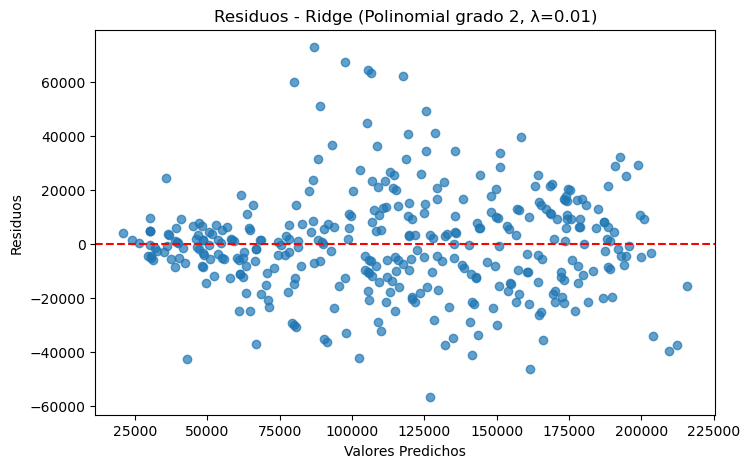

In [172]:
poly_degree = 2
k_folds = 5

poly = PolynomialFeatures(degree=poly_degree, include_bias=False)
scaler = StandardScaler()
kf = KFold(n_splits=k_folds, shuffle=True, random_state=137)

MSE_scores = []
mape_scores = []
R2_scores = [] 


for fold, (train_index, test_index) in enumerate(kf.split(X)):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    X_poly_train = poly.fit_transform(X_train)
    X_poly_test = poly.transform(X_test)
    
    X_scaled_train = scaler.fit_transform(X_poly_train)
    X_scaled_test = scaler.transform(X_poly_test)
    
    X_e_train = sm.add_constant(X_scaled_train, has_constant='add')
    model = sm.OLS(y_train, X_e_train).fit()
    
    X_e_test = sm.add_constant(X_scaled_test, has_constant='add')
    y_pred = model.predict(X_e_test)

    R2_test_score = r2_score(y_test, y_pred)
    R2_scores.append(R2_test_score)
    

modelo_final = Ridge(alpha=0.01, fit_intercept=True)
modelo_final.fit(X_e_train, y_train)
y_pred_final = modelo_final.predict(X_e_test)

# Cálculo de residuos
residuos = y_test - y_pred_final
plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuos, alpha=0.7)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Valores Predichos")
plt.ylabel("Residuos")
plt.title("Residuos - Ridge (Polinomial grado 2, λ=0.01)")
plt.show()

La gráfica de residuos muestra que el modelo está bien especificadoy que no hay tanto sesgo, ya que los puntos se distribuyen de forma aleatoria alrededor de la línea de cero. Sin embargo, la dispersión de los errores forma un claro patrón donde la variabilidad de los residuos es mucho mayor a medida que aumentan los valores salariales predichos. Esto significa que el modelo es más confiable para predecir salarios bajos o medios y es menos preciso al estimar salarios altos.

### Histograma de residuos

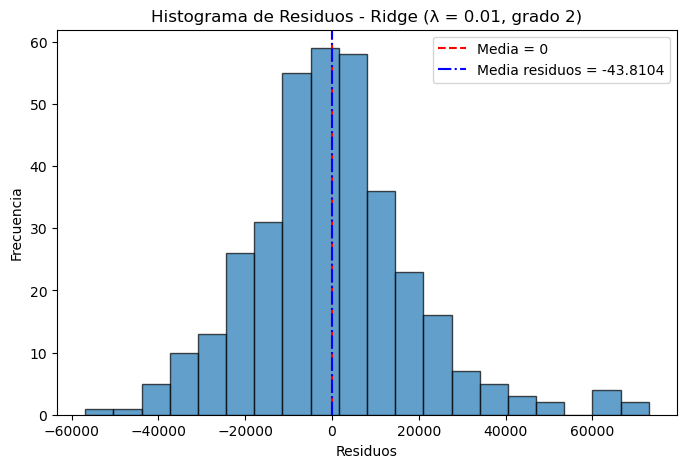

In [173]:
residuos = y_test - y_pred_final
plt.figure(figsize=(8,5))
plt.hist(residuos, bins=20, edgecolor="black", alpha=0.7)
plt.axvline(x=0, color="red", linestyle="--", label="Media = 0")
plt.axvline(residuos.mean(), color="blue", linestyle="-.", label=f"Media residuos = {residuos.mean():.4f}")
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.title("Histograma de Residuos - Ridge (λ = 0.01, grado 2)")
plt.legend()
plt.show()

La media de los residuos es el error promedio de todas las predicciones, por lo que un valor muy cercano a cero indica que, a lo largo de todo el conjunto de datos, el modelo compensa sus errores. Los residuos muestran una distribución aproximadamente normal y simétrica centrada en cero, lo que valida el ajuste general del modelo. Como se puede ver en la gráfica, la media de los residuos está muy cercana a la media 0, lo que significa que sí hay un buen ajuste.

### Comparación de R2

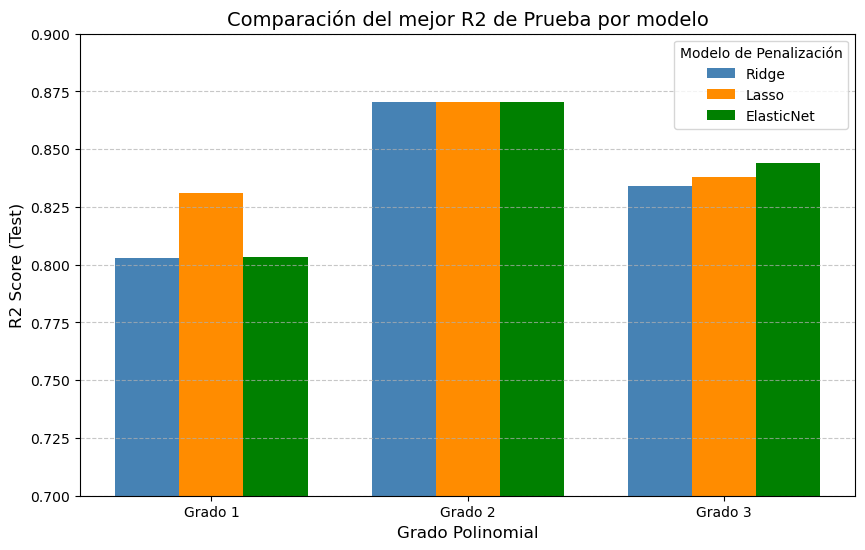

In [174]:
valores_altos_test = [
    # Grado 1 
    {'Grado': 1, 'Model': 'Ridge', 'R2_Test': 0.803111, 'Lambda': 0.0001},
    {'Grado': 1, 'Model': 'Lasso', 'R2_Test':  0.831234, 'Lambda': 1},
    {'Grado': 1, 'Model': 'ElasticNet', 'R2_Test': 0.803139, 'Lambda': 0.01},
    
    # Grade 2 (R2 max at lambda=0.0001/0.01)
    {'Grado': 2, 'Model': 'Ridge', 'R2_Test': 0.87037, 'Lambda': 0.01},
    {'Grado': 2, 'Model': 'Lasso', 'R2_Test': 0.870290, 'Lambda': 0.01},
    {'Grado': 2, 'Model': 'ElasticNet', 'R2_Test': 0.870245, 'Lambda': 0.0001},
    
    # Grade 3 (R2 max at lambda=10/100, ElasticNet usa el mejor disponible)
    {'Grado': 3, 'Model': 'Ridge', 'R2_Test': 0.83426, 'Lambda': 1},
    {'Grado': 3, 'Model': 'Lasso', 'R2_Test': 0.837987, 'Lambda': 10},
    {'Grado': 3, 'Model': 'ElasticNet', 'R2_Test': 0.844243, 'Lambda': 0.1},
]
df_mejor_test = pd.DataFrame(valores_altos_test)

modelos = ['Ridge', 'Lasso', 'ElasticNet']
grados= df_mejor_test['Grado'].unique()
df_test = df_mejor_test.pivot(index='Grado', columns='Model', values='R2_Test')
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25 # Ancho de las barras
x = np.arange(len(grados)) # Posición de los Grados en el eje X

# barras de cada modelo
rects_ridge = ax.bar(x - width, df_test['Ridge'], width, label='Ridge', color='steelblue')
rects_lasso = ax.bar(x, df_test['Lasso'], width, label='Lasso', color='darkorange')
rects_elastic = ax.bar(x + width, df_test['ElasticNet'], width, label='ElasticNet', color='green')

# formato de gráfica
ax.set_title('Comparación del mejor R2 de Prueba por modelo', fontsize=14)
ax.set_ylabel('R2 Score (Test)', fontsize=12)
ax.set_xlabel('Grado Polinomial', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'Grado {g}' for g in grados])
ax.set_ylim(0.7, 0.9) # Recortar el eje Y para destacar las diferencias
ax.legend(title='Modelo de Penalización')
ax.grid(axis='y', linestyle='--', alpha=0.7)


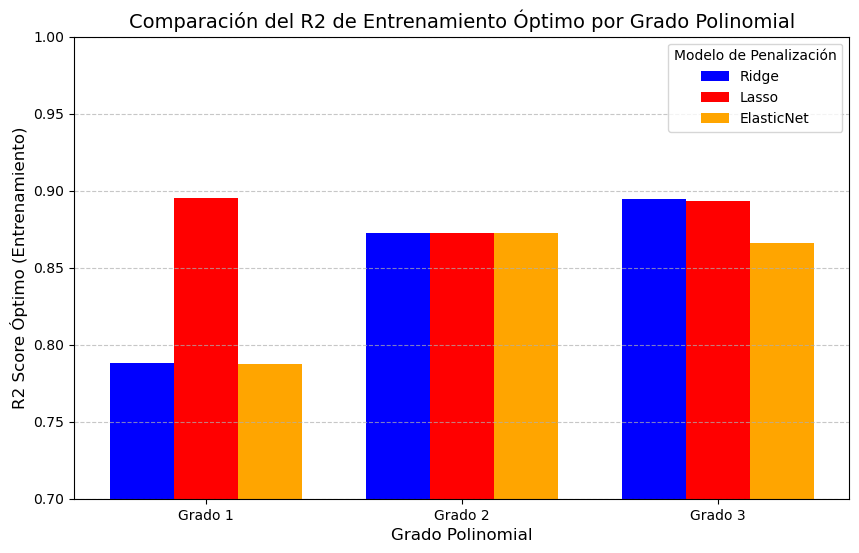

In [175]:
valores_altos_train = [
    # Grado 1 
    {'Grado': 1, 'Model': 'Ridge', 'R2_Train': 0.787891, 'Lambda': 0.0001},
    {'Grado': 1, 'Model': 'Lasso', 'R2_Train': 0.89518, 'Lambda': 1},
    {'Grado': 1, 'Model': 'ElasticNet', 'R2_Train': 0.7877, 'Lambda': 0.01},
    
    # Grade 2 
    {'Grado': 2, 'Model': 'Ridge', 'R2_Train': 0.872599, 'Lambda': 0.01},
    {'Grado': 2, 'Model': 'Lasso', 'R2_Train': 0.87244, 'Lambda': 0.01},
    {'Grado': 2, 'Model': 'ElasticNet', 'R2_Train': 0.8724, 'Lambda': 0.0001},
    
    # Grade 3 
    {'Grado': 3, 'Model': 'Ridge', 'R2_Train': 0.89491, 'Lambda': 1},
    {'Grado': 3, 'Model': 'Lasso', 'R2_Train': 0.89333, 'Lambda': 10},
    {'Grado': 3, 'Model': 'ElasticNet', 'R2_Train': 0.86631, 'Lambda': 0.1}, 
]

df_mejor_train = pd.DataFrame(valores_altos_train)
modelos = ['Ridge', 'Lasso', 'ElasticNet']
grados = df_mejor_train['Grado'].unique()
df_train = df_mejor_train.pivot(index='Grado', columns='Model', values='R2_Train')
fig, ax = plt.subplots(figsize=(10, 6))
width = 0.25 
x = np.arange(len(grados)) 

# barras de cada modelo
rects_ridge = ax.bar(x - width, df_train['Ridge'], width, label='Ridge', color='blue')
rects_lasso = ax.bar(x, df_train['Lasso'], width, label='Lasso', color='red')
rects_elastic = ax.bar(x + width, df_train['ElasticNet'], width, label='ElasticNet', color='orange')

# Configuración
ax.set_title('Comparación del R2 de Entrenamiento Óptimo por Grado Polinomial', fontsize=14)
ax.set_ylabel('R2 Score Óptimo (Entrenamiento)', fontsize=12)
ax.set_xlabel('Grado Polinomial', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels([f'Grado {g}' for g in grados])
ax.set_ylim(0.7, 1.0) # Ajustar el eje Y
ax.legend(title='Modelo de Penalización')
ax.grid(axis='y', linestyle='--', alpha=0.7)


Como se puede ver en la primer gráfica de barras, el grado dos es el que tiene un coeficiente de determinación más alto para los tres tipos de regularizaciones. Por el otro lado, en el train, el lasso del grado 1 salta mucho, pero si lo comparas con su test, es mucho más alto, por lo que podría haber indicios de overfitting. El modelo tres es el que, en el train, tiene un mejor desempeño pero, de igual manera, al comparar su test, también están muy altos. Estas gráficas confirman la elección de nuestro modelo, ya que para el grado 2 en train y test, los números son muy parecidos, lo que indica un modelo más estable y con mayor capacidad para generalizar con datos nuevos.

## 8. Conclusión
El proyecto permitió comprobar que la calidad del análisis exploratorio de datos es tan importante como el modelo en sí, pues limpiar, transformar y agrupar variables fue clave para obtener resultados más estables. A pesar de que el gran repertorio de categorías presentó varios desafíos iniciales que resolvimos con agrupaciones, observamos que factores como la educación, la experiencia y el tipo de puesto tienen un impacto relevante en los salarios. La comparación entre modelos mostró que la regresión lineal ofrece una base sólida, mientras que la polinomial, aunque más flexible, tiende a sobreajustar si no se controla adecuadamente. En este sentido, las técnicas de regularización demostraron su utilidad para equilibrar el ajuste y la generalización, y finalmente el modelo de Ridge fue el seleccionado por ofrecer el mejor compromiso entre generalización, capacidad predictiva e interpretación de los resultados. Más allá de las métricas como MAPE o MSE, la lección principal fue comprender que la predicción robusta y las interpretaciones deben tener prioridad sobre la búsqueda exclusiva de significancia estadística. Finalmente, este trabajo deja como reflexión que el verdadero valor de la regresión no está en alcanzar el modelo perfecto, sino en interpretar sus resultados con criterio y vincularlos con escenarios que se asemeje a lo que vivimos.

## 8. Referencias

- Salary.Data. (2025, September 5). https://www.kaggle.com/datasets/ahmadrazakashif/salary-data
- E. Lewinson and E. Lewinson, “A comprehensive guide to interaction terms in linear regression,” NVIDIA Technical Blog, Jun. 09, 2023.https://developer.nvidia.com/blog/a-comprehensive-guide-to-interaction-terms-in-linear-regression/
- Murel, J., PhD, & Kavlakoglu, E. (2025, 18 febrero). Regression de ridge. ¿Qué es regression de ridge? https://www.ibm.com/mx-es/think/topics/ridge-regression#:~:text=La%20regularizaci%C3%B3n%20es%20un%20m%C3%A9todo,en%20el%20an%C3%A1lisis%20de%20regresi%C3%B3n.